Importing libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df = pd.read_csv("US CPI.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1301 non-null   object 
 1   CPI      1301 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [39]:
df.describe()

,CPI
count,1301.000000
mean,82.346669
std,80.085504
min,9.700000
25%,17.400000
50%,33.000000
75%,147.400000
max,269.195000


In [3]:
print(df.head())

      Yearmon  CPI
0  01-01-1913  9.8
1  01-02-1913  9.8
2  01-03-1913  9.8
3  01-04-1913  9.8
4  01-05-1913  9.7


In [4]:
print(df.shape)

(1301, 2)


In [6]:
df_nodate = df.drop(columns=['Yearmon'])
df_pctChange = df_nodate.pct_change()
df_pctChange = df_pctChange.rename(columns={'CPI': 'pctChg'})

print(df_pctChange.head())

     pctChg
0       NaN
1  0.000000
2  0.000000
3  0.000000
4 -0.010204


In [7]:
df_pctChange = pd.concat([df,df_pctChange], axis=1)

print(df_pctChange.tail(12))

         Yearmon      CPI    pctChg
1289  01-06-2020  257.797  0.005472
1290  01-07-2020  259.101  0.005058
1291  01-08-2020  259.918  0.003153
1292  01-09-2020  260.280  0.001393
1293  01-10-2020  260.388  0.000415
1294  01-11-2020  260.229 -0.000611
1295  01-12-2020  260.474  0.000941
1296  01-01-2021  261.582  0.004254
1297  01-02-2021  263.014  0.005474
1298  01-03-2021  264.877  0.007083
1299  01-04-2021  267.054  0.008219
1300  01-05-2021  269.195  0.008017


In [41]:
df_pctChange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1301 non-null   object 
 1   CPI      1301 non-null   float64
 2   pctChg   1300 non-null   float64
dtypes: float64(2), object(1)
memory usage: 30.6+ KB


In [42]:
df_pctChange.describe()

,CPI,pctChg
count,1301.000000,1300.000000
mean,82.346669,0.002572
std,80.085504,0.006447
min,9.700000,-0.031579
25%,17.400000,0.000000
50%,33.000000,0.002394
75%,147.400000,0.005464
max,269.195000,0.058824


In [60]:
# Date with highest CPI
print(df_pctChange[df_pctChange['CPI'] == 269.195])

         Yearmon      CPI    pctChg
1300  01-05-2021  269.195  0.008017


In [72]:
# Date with highest percentage increase in CPI
print(df_pctChange[df_pctChange['pctChg'] > .058823])

        Yearmon   CPI    pctChg
402  01-07-1946  19.8  0.058824


In [83]:
# Date with lowest percentage increase in CPI
print(df_pctChange[df_pctChange['pctChg'] < -.031578])

       Yearmon   CPI    pctChg
97  01-02-1921  18.4 -0.031579


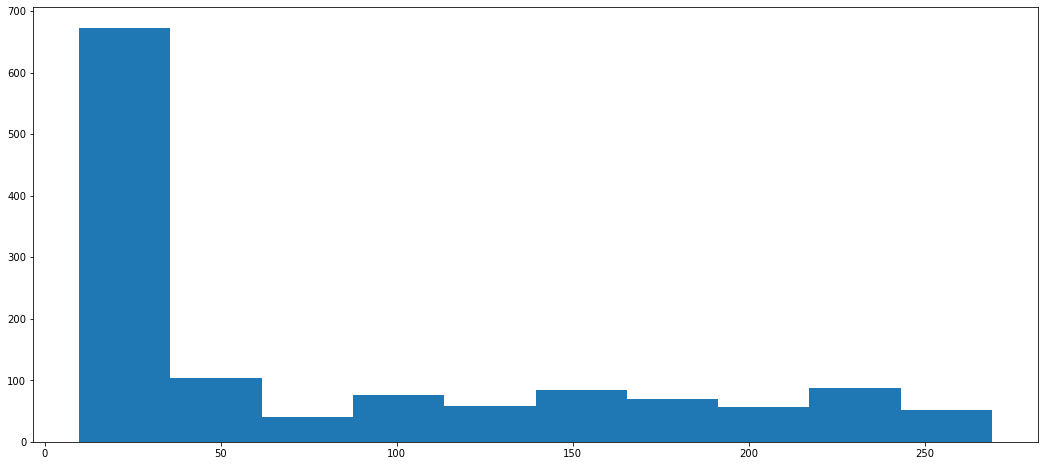

In [53]:
#Histogram of CPI
plt.figure(figsize=(18,8))
plt.hist(df_pctChange['CPI'])
plt.show()

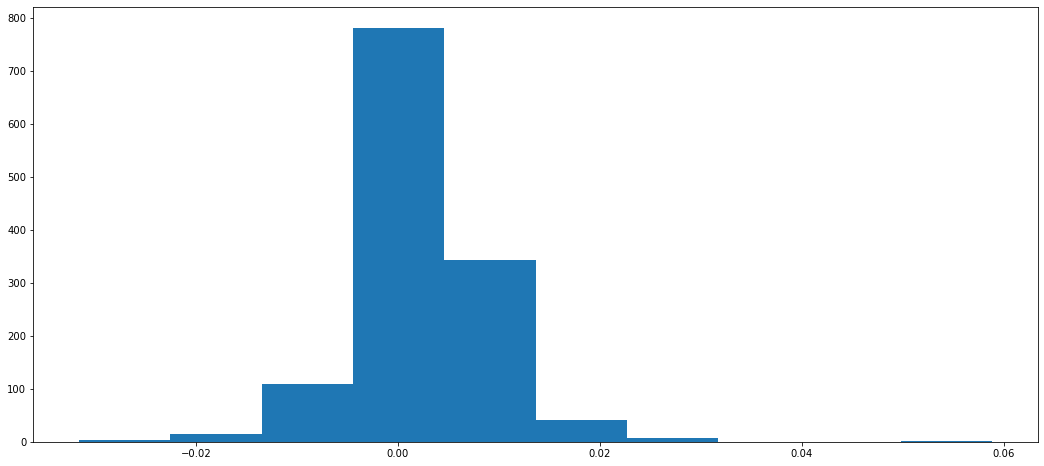

In [84]:
#Histogram of percentage change in the CPI
plt.figure(figsize=(18,8))
plt.hist(df_pctChange['pctChg'][1:])
plt.show()

A majority of the percentage change hovers around 0.00 and 0.01

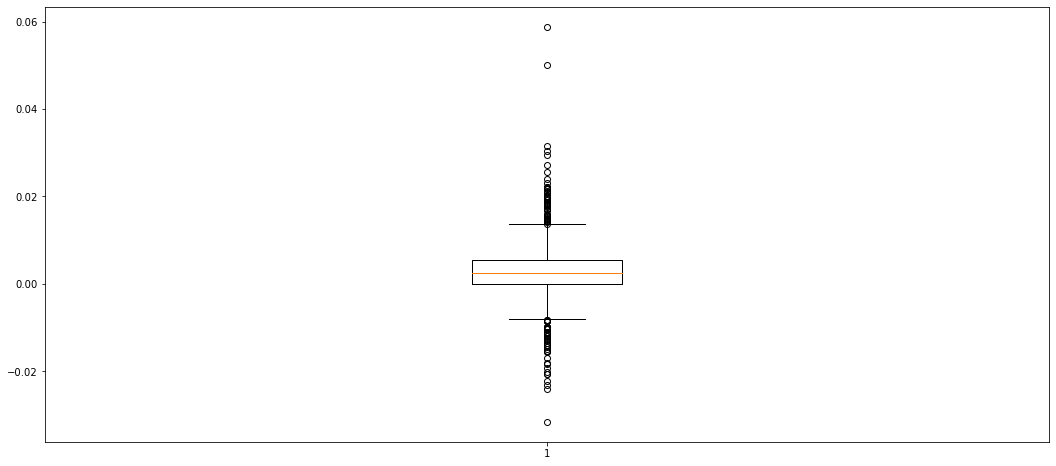

In [47]:
plt.figure(figsize=(18,8))
plt.boxplot(df_pctChange['pctChg'][1:])
plt.show()

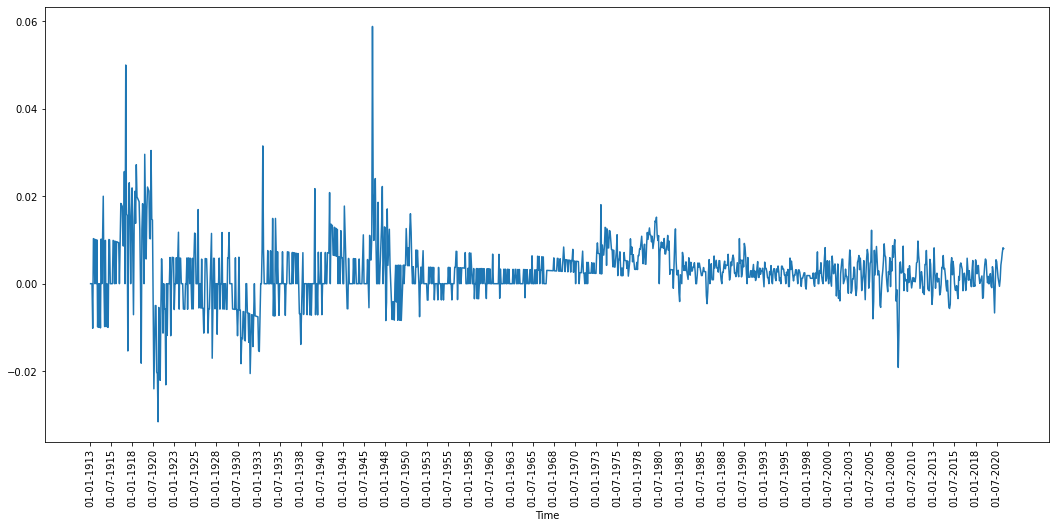

In [32]:
startIndex = 0
endIndex = len(df_pctChange)
plt.figure(figsize=(18,8))
plt.plot(df_pctChange['Yearmon'][startIndex:endIndex],df_pctChange['pctChg'][startIndex:endIndex])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df_pctChange['Yearmon'][startIndex:endIndex]),30))
plt.show()

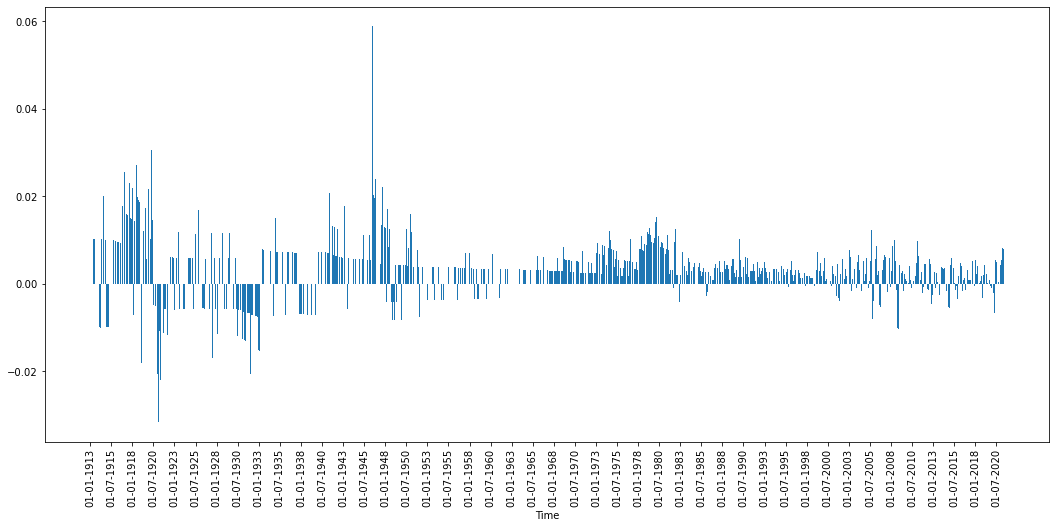

In [33]:
plt.figure(figsize=(18,8))
plt.bar(df_pctChange['Yearmon'][startIndex:endIndex],df_pctChange['pctChg'][startIndex:endIndex])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df_pctChange['Yearmon'][startIndex:endIndex]),30))
plt.show()

In [49]:
print(df_pctChange[1176:1180])

         Yearmon      CPI    pctChg
1176  01-01-2011  220.223  0.004763
1177  01-02-2011  221.309  0.004931
1178  01-03-2011  223.467  0.009751
1179  01-04-2011  224.906  0.006439


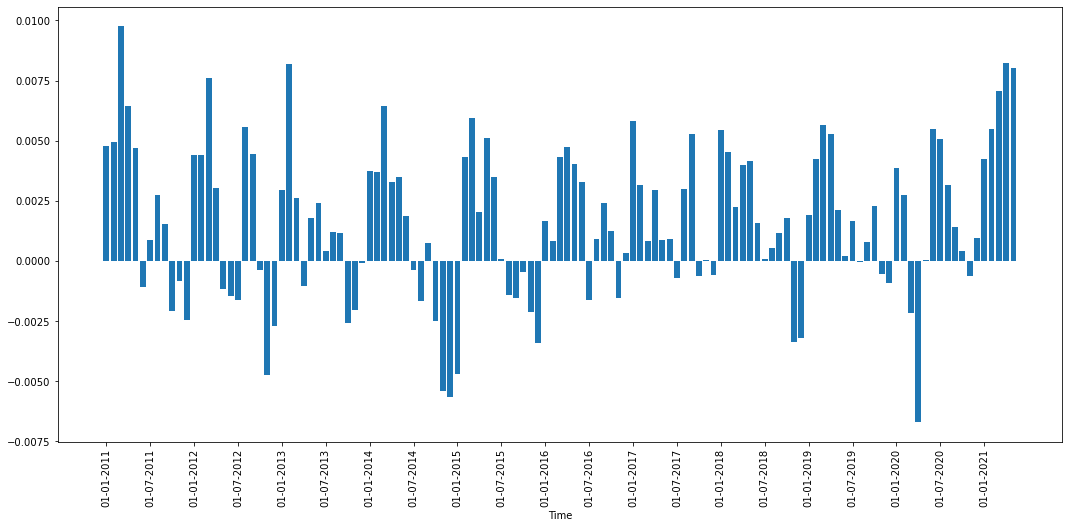

In [86]:
startIndex = 1176
endIndex = len(df_pctChange)
plt.figure(figsize=(18,8))
plt.bar(df_pctChange['Yearmon'][startIndex:endIndex],df_pctChange['pctChg'][startIndex:endIndex])
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df_pctChange['Yearmon'][startIndex:endIndex]),6))
plt.show()

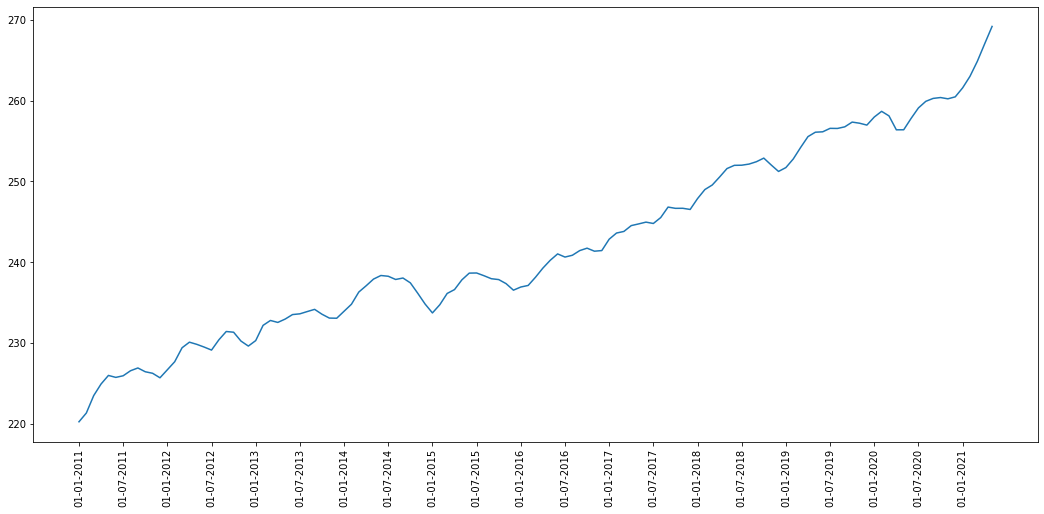

In [85]:
plt.figure(figsize=(18,8))
plt.plot(df_pctChange['Yearmon'][startIndex:endIndex],df_pctChange['CPI'][startIndex:endIndex])
plt.xticks(rotation=90)
plt.xticks(np.arange(0,len(df_pctChange['Yearmon'][startIndex:endIndex]),6))
plt.show()

In [93]:
df_pctChange['Yearmon'] = pd.to_datetime(df_pctChange['Yearmon'])
df_pctChange['Yearmon'] = df_pctChange['Yearmon'].map(dt.datetime.toordinal)

In [97]:
df_pctChange.head()

,Yearmon,CPI,pctChg
0,698344,9.8,NaN
1,698345,9.8,0.000000
2,698346,9.8,0.000000
3,698347,9.8,0.000000
4,698348,9.7,-0.010204


In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_pctChange[['Yearmon']],
                                                    df_pctChange[['CPI']],
                                                    test_size=0.20,
                                                    random_state=0)

In [111]:
print(X_train)

      Yearmon
1064   730494
1184   734146
568    715514
1249   736331
491    712965
...       ...
763    721361
835    723553
1216   735238
559    715152
684    719163

[1040 rows x 1 columns]


In [172]:
lr = LinearRegression()
lr.fit(X_train, y_train, 2)

LinearRegression()

In [166]:
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

print(lr_train_score)
print(lr_test_score)

0.8314274288991645
0.8415577239953879


In [167]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: [-4478.54252667]
slope: [[0.00635261]]


In [169]:
print('Yearmon start:',df_pctChange['Yearmon'][0])
print('Yearmon end:',df_pctChange['Yearmon'][len(df_pctChange)-1])

Yearmon start: 698344
Yearmon end: 737795


In [170]:
# Create x and y for linear equation
x = np.arange(df_pctChange['Yearmon'][0],df_pctChange['Yearmon'][len(df_pctChange)-1])
#print(x)

y = lr.coef_[0] * x + lr.intercept_[0]
print(y)

[-42.23749551 -42.23114291 -42.2247903  ... 208.36014815 208.36650076
 208.37285337]


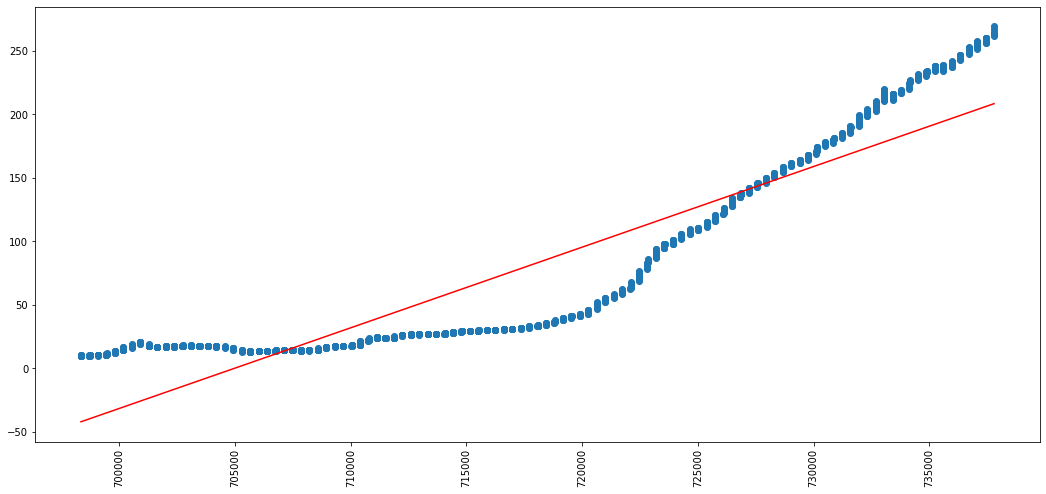

In [171]:
plt.figure(figsize=(18,8))
plt.scatter(df_pctChange['Yearmon'],df_pctChange['CPI'])
plt.plot(x, y, c='r')
plt.xticks(rotation=90)
plt.show()

In [184]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [185]:
# Create x and y for linear equation
x = np.arange(df_pctChange['Yearmon'][0],df_pctChange['Yearmon'][len(df_pctChange)-1])
print(x)

#y = pol_reg.predict(poly_reg.fit_transform([x]))
#print(y)

[698344 698345 698346 ... 737792 737793 737794]


In [188]:
print('intercept:', pol_reg.intercept_)
print('slope:', pol_reg.coef_)

intercept: [135108.64408547]
slope: [[ 0.00000000e+00 -3.82615330e-01  2.70901552e-07]]


In [189]:
print(X_poly)

[[1.00000000e+00 7.30494000e+05 5.33621484e+11]
 [1.00000000e+00 7.34146000e+05 5.38970349e+11]
 [1.00000000e+00 7.15514000e+05 5.11960284e+11]
 ...
 [1.00000000e+00 7.35238000e+05 5.40574917e+11]
 [1.00000000e+00 7.15152000e+05 5.11442383e+11]
 [1.00000000e+00 7.19163000e+05 5.17195421e+11]]
